In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dir =  r'/data/train'


In [3]:
print(dir)

/data/train


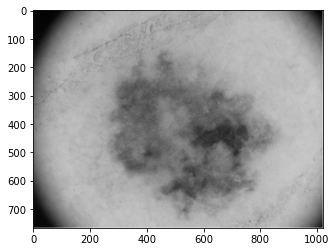

In [4]:

import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\saich\Desktop\mini project\code\data\train"

CATEGORIES = ["melanoma", "nevus","seborrheic_keratosis"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:

""""datagen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

datagen_test = ImageDataGenerator(rescale = 1./255.)"""

# Shape of the images (lxl)
#if model_id is 0:  l = 224
#else:
l = 299

# Iterators for each dataset
#train_it = datagen_train.flow_from_directory(dir, classes=3, batch_size=8, target_size= (l, l))
#val_it = datagen_test.flow_from_directory(valid_ds, class_mode='binary', batch_size=16, target_size= (l, l))
#test_it = datagen_test.flow_from_directory(test_ds, class_mode='binary',batch_size=16, target_size=(l, l))

#batchX, batchy = train_it.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_ds = train_datagen.flow_from_directory(
        'data/train',
        target_size=(299, 299),
        batch_size=32,
        )

Found 2000 images belonging to 3 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(299, 299),
        batch_size=32,
        )




Found 600 images belonging to 3 classes.


# trianing the model


In [10]:
x_model = Sequential()

In [11]:

pre_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(299, 299, 3),
    pooling=None,
   
)
#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in pre_model.layers:
        layer.trainable=False

x_model.add(pre_model)

In [12]:
x_model.add(Flatten())

x_model.add(Dense(3, activation='softmax'))


In [13]:
x_model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 98304)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 294915    
Total params: 54,631,651
Trainable params: 294,915
Non-trainable params: 54,336,736
_________________________________________________________________


In [14]:
x_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                          filepath=cp,
                          save_weights_only=True,
                          monitor='val_accuracy',
                          mode='max',
                          save_best_only=True)

NameError: name 'cp' is not defined

In [22]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [16]:
h = x_model.fit(x=train_ds,
                epochs=10, 
                verbose=1,  
                validation_data=validation_generator,
                steps_per_epoch = 30
              )

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 7.3149 - accuracy: 0.5604

KeyboardInterrupt: 